# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<h2>SOLUTION: What test is appropriate for this problem?</h2>

<p>This is an interesting question, and it can be argued that there are two possible correct answers (such is life). First note the wording of the question: does race have a *significant impact* on callback. This usually suggests a $\chi^2$-test, but the $\chi^2$-test requires *frequencies* rather than percentages. Interestingly, one of the code snippets above uses frequency so we will look at that in a bit.</p>

For now, a two-sample $z$-test:

$$z = \frac{\left( \hat{p}_W - \hat{p}_B \right) - 0}{\sqrt{\hat{p} (1 - \hat{p)} \left( \frac{1}{n_W} + \frac{1}{n_B}\right)}}$$

where

$$\hat{p} = \frac{y_W + y_B}{n_W + n_B}$$

The null and alternate hypotheses:

$$H_0: p_B = p_W$$
$$H_A: p_B \ne p_W$$

CLT applies because we assume that the samples are representative of the population. The observations in each sample are assumed to be independent since the sample was drawn randomly.

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

n_w = len(w)
n_b = len(b)

prop_w = np.sum(w.call) / len(w)
prop_b = np.sum(b.call) / len(b)

prop_diff = prop_w - prop_b
phat = (np.sum(w.call) + np.sum(b.call)) / (len(w) + len(b))

z = prop_diff / np.sqrt(phat * (1 - phat) * ((1 / n_w) + (1 / n_b)))
pval = stats.norm.cdf(-z) * 2
print("Z score: {}".format(z))
print("P-value: {}".format(pval))

Z score: 4.108412152434346
P-value: 3.983886837585077e-05


In [6]:
moe = 1.96 * np.sqrt(phat * (1 - phat) * ((1 / n_w) + (1 / n_b)))
ci = prop_diff + np.array([-1, 1]) * moe
print("Margin of Error: {}".format(moe))
print("Confidence interval: {}".format(ci))

Margin of Error: 0.015281912310894095
Confidence interval: [0.01675094 0.04731477]


<div class="span5 alert alert-success">
<p>The p-value is practically 0 so we reject the null hypothesis that white and black sounding names have the same callback rate. They do not.</p>

<p>Since 0 is not in the confidence interval, we reject the null hypothesis with the same conclusion.</p>

<h4>SOLUTION: Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?</h4>

<p>No! While our test did show that there is a difference in callback rate based on race alone, there are other variables that may also contribute to, or interact with, race to explain the difference. In the original research paper, the researchers cited geography/city as a confounding variable. Additionally, we could also look at education and experience levels as well. But, in our very narrow example, we have shown that there is a significant difference in callback rates between white people and black people.</p>

<p>The $\chi^2$ approach:</p>
</div>

In [7]:
cont_table = pd.crosstab(index=data.call, columns=data.race)
chi2, pval, _, _ = stats.chi2_contingency(cont_table)
print("Chi-squared test statistic: {}".format(chi2))
print("p-value: {}".format(pval))

Chi-squared test statistic: 16.44902858418937
p-value: 4.997578389963255e-05


<div class="span5 alert alert-success">
The chi-squared test yields a similar result. We reject the null hypothesis that race and callback rate are independent. The margin of error and confidence interval calculations are a bit more complicated because the chi-squared distribution is not always symmetric, depending on the number of degrees of freedom.
</div>

# What test is appropriate for this problem? Does CLT apply?

This is a binary response type of problem (1,0) which makes it a Bernoulli distribution or binomial distribution. However, testing the difference between the "percentage called back" for each race will follow a normal distribution in which CLT can be applied. Two sample t-test is appropriate to use in comparing these two percentages.

# What are the null and alternate hypotheses?

Ho: There is no difference between black and white resumes/ There is no significant difference between "percentage called back" for black and white resumes. H1: There is difference between black and white resumes/ There is significant difference between "percentage called back" for black and white resumes. Sample size>30 so z-statistic is appropriate

In [8]:
# number of callbacks for black-sounding names
tot_b_called=sum(data[data.race=='b'].call)
tot_b_called

157.0

In [9]:
total_b=data[data.race=='b'].race.size
total_b

2435

In [10]:
## % of black that were called
per_b=tot_b_called/total_b*100
per_b

6.447638603696099

In [11]:
data.race.size

4870

In [12]:
# number of callbacks for white-sounding names
tot_w_called=sum(data[data.race=='w'].call)
tot_w_called

235.0

In [13]:
total_w=data[data.race=='w'].race.size
total_w

2435

In [14]:
## % white called 
per_w=tot_w_called/total_w * 100
per_w

9.650924024640657

In [15]:
diff=per_w-per_b
diff

3.2032854209445585

In [16]:
## percentage callback Black variance
P1=per_b/100
n1=total_b
Black_variance=(P1*(1-P1)/n1)
Black_variance

2.4771737856498466e-05

In [17]:
## percentage callback White variance
P2=per_w/100
n2=total_w
White_variance=(P2*(1-P2)/n2)
White_variance

3.580911983304638e-05

In [18]:
## Sampling Distribution P1-P2 variance
Black_White_variance = Black_variance + White_variance
Black_White_variance

6.058085768954485e-05

In [19]:
Black_White_std=np.sqrt(Black_White_variance)
Black_White_std

0.0077833705866767544

In [20]:
abs(P1-P2)

0.032032854209445585

# Compute margin of error, confidence interval, and p-value.

In [21]:
## Using 95% Confidence level that (P1-P2) is within d of 0.032
#margin of error
margin_of_error=1.96*Black_White_std
margin_of_error

0.015255406349886438

In [22]:
min_P1_P2=abs(P1-P2)-margin_of_error
min_P1_P2

0.016777447859559147

In [23]:
max_P1_P2=abs(P1-P2)+margin_of_error
max_P1_P2

0.047288260559332024

In [24]:
## confidence interval
confidence_interval = abs(P1-P2) + np.array([-1, 1]) * margin_of_error
confidence_interval

array([0.01677745, 0.04728826])

In [25]:

## Standard Error Calculation
Standard_Error=Black_White_std
Standard_Error

0.0077833705866767544

In [26]:
## degrees of freedom
B1=Black_variance/n1
W1=White_variance/n2

Degrees_of_Freedom=((B1+W1)**2)/(((B1**2)/n1)+((W1**2)/n2))
Degrees_of_Freedom

4713.53819343226

In [27]:
t_val=((P1-P2)-0)/Standard_Error
t_val

-4.11555043573

In [28]:
p_value = stats.t.sf(np.abs(t_val), Degrees_of_Freedom)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value

3.9285451158654165e-05

In [29]:
bb=data[data.race=='b'].call
ww=data[data.race=='w'].call

In [30]:
stats.ttest_ind(bb,ww,equal_var=False)

Ttest_indResult(statistic=-4.114705290861751, pvalue=3.942941513645935e-05)

In [31]:
std_b=np.sqrt(Black_variance)
std_b

0.004977121442811946

In [32]:
std_w=np.sqrt(White_variance)
std_w

0.005984072178128066

In [33]:
##Normal Distribution graph for Black and White % Call backs
import pylab
x = np.linspace(0.04,0.125,4870)
y1 = stats.norm.pdf(x, loc=P1, scale=std_b)    
pylab.plot(x,y1)

y2 = stats.norm.pdf(x, loc=P2, scale=std_w)    
pylab.plot(x,y2)
pylab.xlabel('Percentage Callbacks')
pylab.ylabel('PDF')
pylab.vlines(P1,0, 100, color='red')
pylab.vlines(P2,0,100, color='blue')
pylab.legend(['Black', 'White', '6.4%', '9.7%'])
pylab.title('Percentage CallBacks for Black and White Names')
pylab.show()

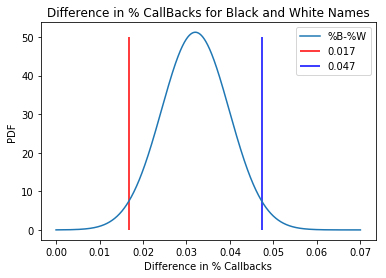

In [34]:
## Normal Distribution of difference in percentage of Black and White Callbacks
x = np.linspace(0,0.07,4870)
y1 = stats.norm.pdf(x, loc=abs(P1-P2), scale=Black_White_std)    
pylab.plot(x,y1)

pylab.xlabel('Difference in % Callbacks')
pylab.ylabel('PDF')
pylab.vlines(min_P1_P2,0, 50, color='red')
pylab.vlines(max_P1_P2,0,50, color='blue')
pylab.legend(['%B-%W', '0.017', '0.047'])
pylab.title('Difference in % CallBacks for Black and White Names')
pylab.show()

# Calculated p_value < 0.05¶¶
so "Ho will be rejected and H1 will be accepted. Yes there is significance difference between black and white name sounding resumes looking at percentage callbacks.

# Write a story describing the statistical significance in the context or the original problem.
Using 95% confidence level as threshold in all calculations, we can say that there is 95% confidence that confidence interval of "difference in % callbacks in black and white sounding resume" is from 0.017 to 0.047.

# Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
The analysis I did does not mean that race/name is the most important factor in callback success. It only means that race/name is a factor that affect callback success. Correlation between different features and callback success must be analyzed and ranked to test which feature is most important in callback success.